# 3. Multiplexing A 
---------------------------------------------


In [1]:
from IPython.core.display import HTML


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

### Comments

This chapter explores the statistical sharing of resources.  The main tool is the central limit theorem that enables the calculation of confidence intervals.  Along the way, we discuss Gaussian random variables.

## 3.1. Central Limit Theorem for Coin Flips

You flip a biased coin $N$ times.  The probability of heads is $p$.  Let $X(N)$ be the number of heads.  Then,
$$P(X(N) = n) = {N \choose n} p^n (1 - p)^{N-n}, n = 0, 1, \ldots, N. \tag{3.1}$$
The main result is as follows:

### Theorem (CLT)

One has
$$\frac{X(N) - Np}{\sqrt{Np(1-p)}} \Rightarrow {\cal N}(0,1) \mbox{ as } N \to \infty. \tag{3.2}$$

This result states that, when $N$ is large, the random variable on the left of (3.2) is almost distributed like a ${\cal N}(0,1)$ random variable $X$.  By definition, $X =_D {\cal N}(0,1)$ if its p.d.f. is $f(x)$ where
$$f(x) = \frac{1}{\sqrt{2 \pi}} \exp\{- \frac{x^2}{2}\}. \tag{3.3}$$

The graph below illustrates that result:

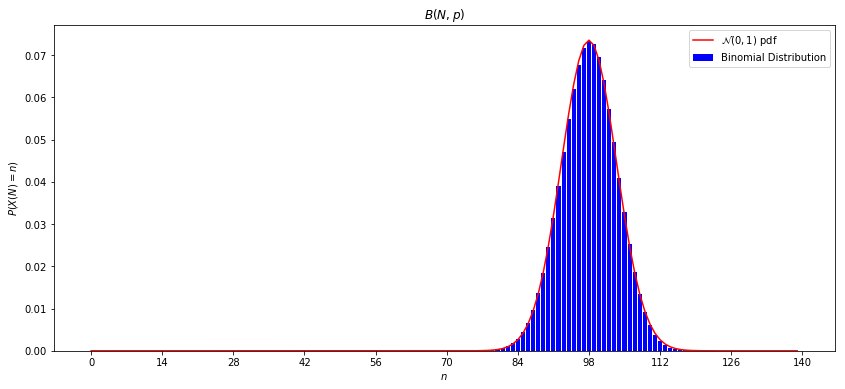

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import math
from matplotlib import pyplot as plt
from ipywidgets import *
from IPython.display import display



def bino_demo(N,p):
    a = np.arange(0,N)
    b = np.arange(0.0,N)
    c = np.arange(0.0, N)
    A = (N*p*(1-p))**(-0.5)*(2*math.pi)**(-0.5)
    b[0]=(1 - p)**(N)
    for i in range(1,N):
        b[i] = p/(1-p)*b[i-1]*(N - i +1)/i 
        c[i] = A*np.exp(- ((i - N*p)**2)/(2*p*(1-p)*N))
    plt.figure(figsize = (14,6))    
    plt.bar(a, b, color='b', label = 'Binomial Distribution')
    plt.plot(a, c, color='r', label = "${\cal N}(0,1)$ pdf")
    d = [0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    plt.xticks(d)
    plt.legend()
    plt.ylabel("$P(X(N) = n)$")
    plt.xlabel("$n$")
    plt.title("$B(N,p)$")
        

w1 = widgets.IntSlider(description='N', min = 10, max = 200, step = 10, value = 100, position = 'bottom')
w2 = widgets.FloatSlider(description='p', min = 0.1, max = 0.9, step = 0.1, value = 0.5)
z = widgets.interactive(bino_demo, N = w1, p = w2)

display(z)



## 3.2 Properties of Gaussian Random Variabes

We use frequently the following values:

** Fact 1:**
Let $X =_D {\cal N}(0,1)$. Then

\begin{eqnarray*}
&& P(|X| > 1.65) \approx 10\% \tag{3.4} \\
&& P(|X| > 2) \approx 5\% \tag{3.5}
\end{eqnarray*}
The following **slider** lets you explore the function $g(x) = P(|X| > x)$.  (If you do not see the slider, do Menu > Cell > Run All.)


In [3]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt
figsize(8, 6)

import scipy.stats as stats

from ipywidgets import *
from IPython.display import display

w = widgets.FloatSlider(description='x', min = 0, max = 3, step = 0.05, value = 1.65)

def STG_demo(y):
    u = 2*norm.sf(y, loc=0, scale=1)
    return (math.ceil(u*10**3)/10**3)
    
z = widgets.interactive(STG_demo, y = w)
display(z)

0.099

**Definition:** ${\cal N}(\mu, \sigma^2)$

The random variable $Y$ is said to be Gaussian with mean $\mu$ and variance $\sigma^2$, which we write as $Y =_D {\cal N}(\mu, \sigma^2)$, if we can write $Y = \mu + \sigma X$ where $X =_D {\cal N}(0, 1)$.  Equivalently, the pdf of $Y$ is given by
$$f_Y(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\{- \frac{(x - \mu)^2}{2 \sigma^2}\}. \tag{3.6}$$

Equivalently, $Y$ is such that
$$E(\exp\{i u Y\}) = \exp\{i u \mu - \frac{1}{2} u^2 \sigma^2\}. \tag{3.7}$$

**Theorem: Sum of Independent Gaussians**

Let $X_i =_D {\cal N}(\mu_i, \sigma_i^2)$ for $i = 1, 2$ be independent.  Then, 
$$X_1 + X_2 =_D {\cal N}(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2). \tag{3.8}$$

## 3.3 CLT for i.i.d. Random Variables

**Theorem (CLT)**
Let $Y_1, Y_2, \ldots$ be independent and identically distributed random variables with mean $\mu$ and variance $\sigma^2$. Let also $X(N) = Y_1 + \cdots + Y_N$.  Then
$$\frac{X(N) - N \mu}{\sigma\sqrt{N}} \Rightarrow {\cal N}(0,1). \tag{3.9}$$

The book sketches a proof. The method is to calculate $E(\exp\{iuZ(N)\})$ where $Z(N)$ is the left-hand side of (3.8) and to show that this expression converges $\exp\{- u^2/2\}$.  

## 3.4 Confidence Intervals

Let $Y_1, Y_2, \ldots$ be as in the theorem above.  Using (3.4) we find that, for $N \gg 1$,
$$P(|\frac{X(N) - N\mu}{\sigma \sqrt{N}}| > 2) \approx 5\%. $$
Equivalently, 
$$P(\mu \in [\frac{X(N)}{N} - \frac{2\sigma}{\sqrt{N}}, \frac{X(N)}{N} + \frac{2\sigma}{\sqrt{N}} ]) \approx 95\%. \tag{3.10}$$
One says that
$$ [\frac{X(N)}{N} - \frac{2\sigma}{\sqrt{N}}, \frac{X(N)}{N} + \frac{2\sigma}{\sqrt{N}} ] \mbox{ is a } 95\% \mbox{ confidence interval for } \mu. \tag{3.11}$$

In many applications, one wishes to estimate $\mu$ and one uses $X(N)/N$ as an estimate.  Then (3.11) provides a confidence interval for $\mu$.  In many cases, one does not know $\sigma$.  There are two possible ways for deriving a confidence interval in such cases: either using an upper bound for $\sigma$ or replacing $\sigma^2$ by the empirical variance $\sigma_N^2$ defined by
$$\sigma_N^2 := \frac{1}{N-1} \sum_{n=1}^N Y_n^2 - (\frac{X(N)}{N})^2. \tag{3.12}$$

### Coin Flips

The following plot illustrates that result for coin flips.  In that case, one has $\sigma = \sqrt{p(1-p)} \leq 0.5$.  Hence, replacing $\sigma$ by $0.5$ in (3.11), we find that
$$[\frac{X(N)}{N} - \frac{1}{\sqrt{N}}, \frac{X(N)}{N} + \frac{1}{\sqrt{N}} ] \mbox{ is a } 95\% \mbox{ confidence interval for } p. \tag{3.13}$$
We simulate the coin flips and plot $X(n)/n \pm 1/\sqrt{n}.$  For comparison, we also plot $X(n)/n \pm 2 \sigma_n/\sqrt{n}$.


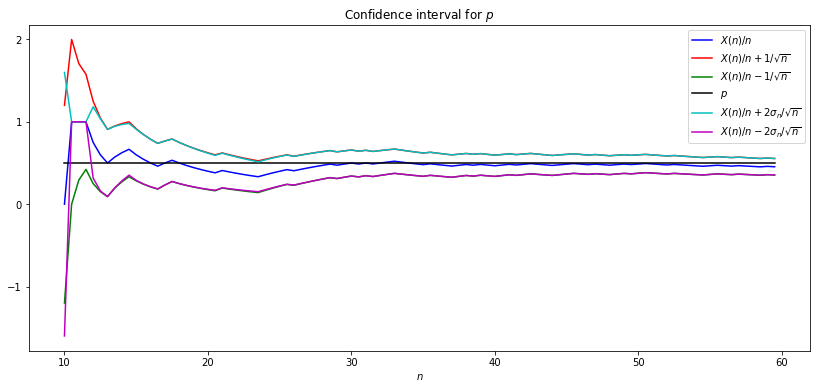

In [4]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure, show
figsize(14, 6)


import scipy.stats as stats

from ipywidgets import *
from IPython.display import display

w1 = widgets.IntSlider(description='N', min = 10, max = 500, step = 10, value = 100)
w2 = widgets.FloatSlider(description='p', min = 0.1, max = 0.9, step = 0.1, value = 0.5)

def CLT1_demo(N,p):
    a = np.arange(0.0,N)
    b = np.arange(0.0,N)
    c = np.arange(0.0,N)
    d = np.arange(0.0,N)
    e = np.arange(0.0,N)
    c[0] = 1.2
    b[0]= 0
    d[0] = 1.6
    e[0] = p
    x = 0.0
    y = 0.0
    for n in range(0,N-1):
        y = np.random.binomial(1,p)
        b[n+1] = (n*b[n] + y)/(n+1)
        c[n+1] = (n+1)**(- 0.5)
        e[n+1] = p
        x = (n*x + y**2)/(n+1) 
        d[n+1] = 2*((x - b[n+1]**2)/(n+1))**(0.5)
        
    ax = figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    #plt.ylabel("Confidence interval for $p$")
    plt.xlabel("$n$")
    plt.title("Confidence interval for $p$") 
    plt.plot(a, b, color='b',label="$X(n)/n$") 
    plt.plot(a, b+c, color='r',label="$X(n)/n + 1/\sqrt{n}$")
    plt.plot(a, b-c, color='g',label="$X(n)/n - 1/\sqrt{n}$")
    plt.plot(a, e, color='black',label="$p$")
    plt.plot(a, b+d, color='c',label="$X(n)/n + 2 \sigma_n/\sqrt{n}$")
    plt.plot(a, b-d, color='m',label="$X(n)/n - 2 \sigma_n/\sqrt{n}$")
    plt.legend()
    d =[0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    d = list(d)
    d = [int(x) for x in d]
    ax.set_xticklabels(d)
    
z = widgets.interactive(CLT1_demo, N = w1, p = w2) 
display(z)  
        

### I.i.d. Random Variables

Next, we consider random variables $Y_m$ that are i.i.d. In case (a), they are $U[0, 1]$; in case (b), they are $U\{1, 2, \ldots, 6\}$; in case (c), they are $Expo(1)$.  

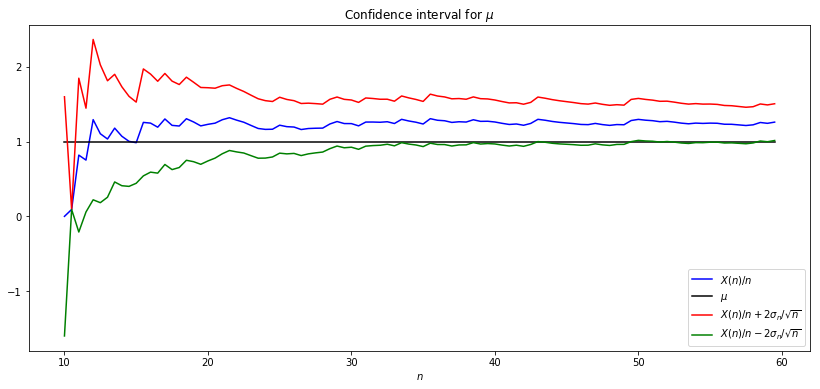

In [5]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure, show
figsize(14, 6)

import scipy.stats as stats

from ipywidgets import *
from IPython.display import display

V = widgets.IntSlider(description='N', min = 10, max = 500, step = 10, value = 100)

def CLT2_demo(w,N):
    a = np.arange(0.0,N)
    b = np.arange(0.0,N)
    d = np.arange(0.0,N)
    e = np.arange(0.0,N)
    if w == '(a)':
        p = 0.5
    elif w == '(b)':
        p = 3.5
    elif w == '(c)':
        p = 1
        
    b[0]= 0
    d[0] = 1.6
    e[0] = p
    x = 0.0
    y = 0.0
    for n in range(0,N-1):
        if w == '(a)':
            y = np.random.random()
        elif w == '(b)':
            y = np.random.randint(1,7)
        elif w == '(c)':
            y = np.random.exponential(1)
        
        b[n+1] = (n*b[n] + y)/(n+1)
        e[n+1] = p
        x = (n*x + y**2)/(n+1) 
        d[n+1] = 2*((x - b[n+1]**2)/(n+1))**(0.5)
        
    ax = figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    #plt.ylabel("Confidence interval for $p$")
    plt.xlabel("$n$")
    plt.title("Confidence interval for $\mu$") 
    plt.plot(a, b, color='b',label="$X(n)/n$") 
    plt.plot(a, e, color='black',label="$\mu$")
    plt.plot(a, b+d, color='r',label="$X(n)/n + 2 \sigma_n/\sqrt{n}$")
    plt.plot(a, b-d, color='g',label="$X(n)/n - 2 \sigma_n/\sqrt{n}$")
    plt.legend()
    d =[0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    d = list(d)
    d = [int(x) for x in d]
    ax.set_xticklabels(d)
    
u = widgets.ToggleButtons(options=['(a)', '(b)', '(c)'],
    description='Case:',
    disabled=False,
    button_style='info', 
    tooltip='Description',
#     icon='check'
)
    
z = widgets.interactive(CLT2_demo, w = u, N = V) 
display(z) 
 
        

## 3.5 Polling

How many coins do we have to flip in order to estimate $p$ within $3\%$ with $95\%$ confidence?  That is, how large should $n$ be for the confidence interval (3.12) to be $\pm 3\%$? One needs $1/\sqrt{n} = 3\%$, so that $n = (1/0.03)^2 = 1112.$

As a standard application, assume that the potential voters in the next presidential election choose candidate $A$ with probability $p$ and candidate $B$ otherwise.  By polling $1112$ people, one can estimate $p$ with a margin of error of $3\%$, with $95\%$ confidence.  

## 3.6 Connection Multiplexing

Imagine $N$ Internet users in one office building.  They share the building's Internet access link that has rate $1$Gbps $= 10^9$bps.  How large can $N$ be if we want every active user to have an acess rate equal to $10$Mbps $= 10^7$bps?  (One assumes that the active users get an equal share of the access link.)

### First Estimate

If the $N$ users are all active, we need $N \times 10^7 \leq 10^9$, i.e., $N \leq 100$.

### Second Estimate

However, users are not active all the time.  Say that a user is active $10\%$ of the time.  Then we expect to need $0.1 \times N \times 10^7 \leq 10^9$, i.e., $N \leq 1000$.

### Third Estimate

We suspect that the calculation above is a bit optimistic.  Indeed, it assumes that exactly $10\%$ of the users are active all the time.  What if more than $10\%$ of the users happen to be active at the same time?  Say that the users are active independently with probability $p = 0.1$.  Using (3.1) and (3.4) and the symmetry of the pdf (3.2), we find that
$$P(\frac{X(N) - Np}{\sqrt{Np(1-p)}} \geq 2) \approx \frac{5\%}{2} = 2.5\%.$$
Equivalently,
$$P(X(N) > Np + 2 \sqrt{Np(1 - p)}) \approx 2.5\%.$$
Thus, if we choose $N$ so that $(Np + 2 \sqrt{Np(1 - p)})10^7 \leq 10^9$, then we know that $P(10^7 X(N) \geq 10^9) \approx 2.5\%$, so that the users have access to $10$Mbps at least $97.5\%$ of the time.  With $p = 0.1$, the inequality becomes $0.1N + 0.6 \sqrt{N} \leq 100$.  Equivalently, $N \leq 828$.  

## 3.7 Packet Multiplexing

In this section, we study a different form of multiplexing. In the previous section, we assumed that an active connection transmits all the time at a constant rate, say $10$Mbps.  Here, we consider that a connection sends packets at random times.  The packets arrive at a buffer that stores them until it can send them.  We are interested in understanding the backlog of packets and their delays.  This type of questions is the topic of queueing theory.  Here, we limit ourselves to a simple model, but it captures the flavor of the theory.

Say that a packet arrives at the buffer with probability $\lambda \in (0,1)$ at each time step.  Also, assume that the buffer completes the transmission of a packet in one time step with probability $\mu \in (0, 1)$.  That is, the transmission time $\tau$ of a packet is geometrically distributed with parameter $\mu$, so that $P(\tau = n) = (1 - \mu)^{n-1} \mu$ for $n = 1, 2, \ldots$.  Let $X_n$ be the number of packets in the buffer at time $n$.  To simplify the algebra, we assume that a time step is very small, so that both $\lambda$ and $\mu$ are very small.  In this case, the likelihood that an arrival and a service completion occur in the same time step is negligible.

With this approximation, we find that
$$ P[X_{n+1} = j | X_n = i] = \left\{
\begin{array}{l l}
\lambda, & \mbox{ if } j = i +1 \\
\mu, & \mbox{ if } j = i -1 \mbox{ and } i > 0 \\
1 - \lambda - \mu, & \mbox{ if } j = i \mbox{ and } i > 0 \\
1 - \lambda, & \mbox{ if } j = i +1 \mbox{ and } i = 0.
\end{array}
\right.
$$

Thus, $X_n$ is a Markov chain with the transition matrix given above.  
We draw the transition diagram below:

![title](Figs/Buffer.pdf)

In this diagram, we do not indicate the probabilities of the self-loops.  They are such that the transition probabilities add up to one at every state.



The balance equations are as follows:
$$\pi(i) \lambda = \pi(i+1) \mu, i \geq 0.$$
The solution is such that $\pi(i+1) = \rho \pi(i)$ for $i \geq 0$ where $\rho = \lambda/\mu$.  Since the probabilities $\pi(i)$ add up to one,  one needs $\lambda < \mu$ and then
$$\pi(i) = (1 - \rho) \rho^i, i \geq 0.$$
Algebra shows that the average value of $X(n)$ is
$$L := E[X(n)] = \frac{\lambda}{\mu - \lambda}.$$

As the book explains, **LIttle's Law** says that
$$L = \lambda W$$
where $W$ is the average delay of a packet in the buffer.  Hence,
$$W = \frac{1}{\mu - \lambda}.$$
Thus, if one wants the average delay $W$ not to exceed $W_0$, we need $\lambda \leq \mu - 1/W_0$.

We simulate the Markov chain below. The simulation does not assume that $\lambda$ and $\mu$ are small.

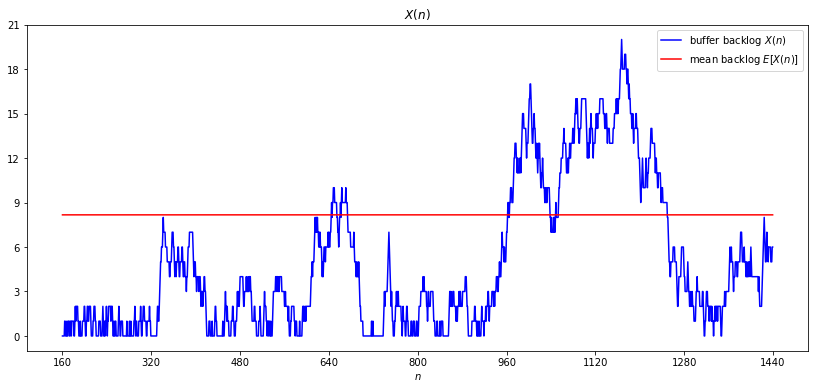

In [6]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure, show
figsize(14, 6)

import scipy.stats as stats

from ipywidgets import *
from IPython.display import display
w1 = widgets.FloatSlider(description='$\lambda$', min = 0.01, max = 0.99, step = 0.01, value = 0.57)
w2 = widgets.FloatSlider(description='$\mu$', min = 0.01, max = 0.99, step = 0.01, value = 0.6)

def Buffer_demo(lamb,mu):
    N = 1600
    a = np.arange(0.0,N)
    b = np.arange(0.0,N)
    c = np.arange(0.0,N)
    b[0]= 0
    if lamb < mu:
        EX = lamb*(1 - lamb)/(mu - lamb)
    elif lamb >= mu:
        EX = 0
    c[0] = EX
    for n in range(0,N-1):
        b[n+1] = max(0, b[n] + np.random.binomial(1,lamb) - np.random.binomial(1,mu)) 
        c[n+1] = EX
    ax = figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    #plt.ylabel("Confidence interval for $p$")
    plt.xlabel("$n$")
    plt.title("$X(n)$") 
    plt.plot(a, b, color='b',label="buffer backlog $X(n)$")
    if lamb < mu:
        plt.plot(a, c, color='r',label="mean backlog $E[X(n)]$")
    else:
        print('The backlog grows without bound')
    plt.legend()
    d =[0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    d = list(d)
    d = [int(x) for x in d]
    ax.set_xticklabels(d)
    
z = widgets.interactive(Buffer_demo, lamb = w1, mu = w2) 
display(z)  

## 3.8 Multiple Access

#### ALOHA

The **Aloha** protocol is a randomized multiple acess scheme that radios can use to share one channel.  In its basic form, time is divided into slots whose length suffices to transmit a packet.  There are $N$ radios.  In each time slot, every radio transmits independently with probability $p$.  Thus, the number $X$ of radios that transmit 
in one time slot is such that $X =_D B(N,p)$.  A time slot is wasted unless exactly one radio transmits.  Thus, the probability of success is $P(X = 1) = Np(1 - p)^{N-1}$.  This probability is maximized when $p = 1/N$, in which case one has $P(X = 1) = (1 - 1/N)^{N-1} \approx 1/e \approx 36\%.$

Here is a plot of $P(X = 1)$.

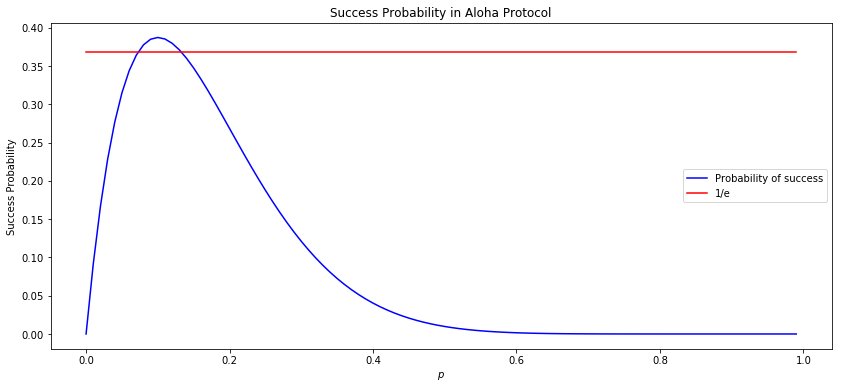

In [7]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import math
from matplotlib import pyplot as plt
figsize(14, 6)

from ipywidgets import *
from IPython.display import display



def CSMA1_demo(N):
    M = 100
    y = np.exp(-1)
    a = np.arange(0.0,M)
    b = np.arange(0.0,M)
    c = np.arange(0.0,M)
    for i in range(0,M):
        x = i/M
        b[i] = N*x*(1 - x)**(N-1)
        c[i] = y 
        a[i] = x
    plt.plot(a, b, color='b', label = 'Probability of success')
    plt.plot(a, c, color='r', label = "1/e")
    plt.legend()
    plt.ylabel("Success Probability")
    plt.xlabel("$p$")
    plt.title("Success Probability in Aloha Protocol")
    
        

w = widgets.IntSlider(description='N', min = 2, max = 20, step = 1, value = 10)
z = widgets.interactive(CSMA1_demo, N = w)

display(z)

### Backoff Slots 

In the basic Aloha protocol, recall that the nodes transmit independently with probability $p$ in each time slot.  Here, we consider a small variation of the protocol.  Time is divided into small slots that are long enough so that if on node transmits first in a slot, the other nodes hear that transmission and do not try to transmit until the first node has finished sending its packet, which takes $M$ slots.  

In this case, there may be a number of idle slots followed by a first non-idle one.  Let $X$ be the number of transmission in a slot.  Thus, $X = B(N,p)$ where there are $N$ active nodes. The probability that a slot is not idle is $\alpha := P(X > 0) = 1 - P(X = 0) = 1 - (1 - p)^N$.  The probability that a non-idle slot is occupied by a single transmission is $P[X = 1 | X > 0] = P(X = 1)/P(X > 0) = Np(1-p)^{N-1}/\alpha =: \beta/\alpha$.  The average number of slots until the first nonempty one is $1/\alpha$.  Thus, on average, there are $1/\alpha - 1$ idle slots, followed by $M$ transmission slots with probability $\beta/\alpha$ or $M$ wasted slots with probability $1 - \beta/\alpha$ because of a collision.  The average duration of this cycle is $1/\alpha - 1 + M$.  Accordingly, the fraction of time that the node use to transmit successfully is given by
$$\eta = \frac{M \beta/\alpha}{1/\alpha - 1 + M} = \frac{M \beta}{(M-1) \alpha + 1}.$$

The code below plots the value of $\eta$ as a function of $p$.

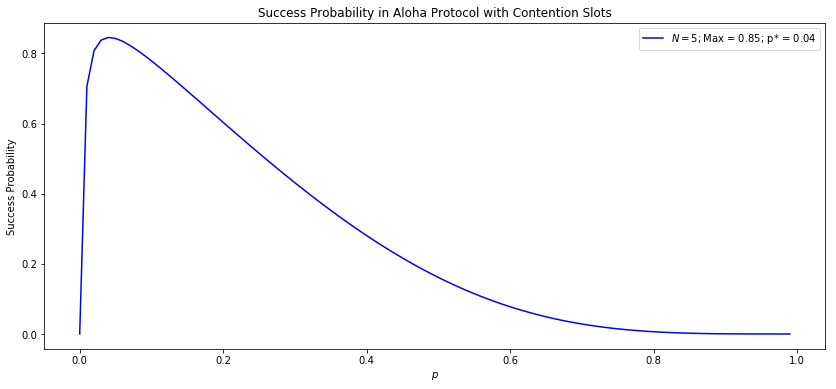

In [8]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure, show
figsize(14, 6)

import scipy.stats as stats

from ipywidgets import *
from IPython.display import display

w3 = widgets.IntSlider(description='N', min = 1, max = 20, step = 1, value = 5)
w5 = widgets.IntSlider(description='M', min = 10, max = 100, step = 10, value = 50)

def CSMA3_demo(N,M):
    S = 100
    a = np.arange(0.0,S)
    b = np.arange(0.0,S)
    for i in range(1,S):
        p = i/S
        alpha = 1 - (1 - p)**N
        beta = N*p*(1 - p)**(N-1)
        b[i] = M*beta/((M-1)*alpha + 1) 
        a[i] = p
    maxb = max(b)
    pb = np.argmax(b)/S
    plt.plot(a, b, color='b', label = "$N = 5; $" + "Max = " + "%.2f"%maxb + "; p* = " + "%0.2f"%pb)
    plt.legend()
    plt.ylabel("Success Probability")
    plt.xlabel("$p$")
    plt.title("Success Probability in Aloha Protocol with Contention Slots")
    
z = widgets.interactive(CSMA3_demo, N = w3, M = w5) 
display(z)  
        

The graph shows that the efficiency of this protocol is close to $80\%$, much larger than the efficiency $1/e \approx 36\%$ of the basic protocol.  What is the basic cause of this increase in efficiency?  In the basic scheme, a cycle is successful if exactly one radio transmits.  In this scheme, a cycle is successful if the first nonempty contention slot is used by a single radio.  This latter probability can be made close to one if the probability of transmitting in one slot is very small.  However, the tradeoff is that this increases the number of idle contention slots before the first transmission.  

#### RTS/CTS ALOHA

In the basic Aloha protocol, a transmission slot is wasted when two or more radios transmit.  A more efficient protocol uses a request to send (RTS) and clear to send (CTS) mechanism that operates as follows.  Time is divided into one contention slots, one acknowledgment slot, then $M$ transmission slots.  During the contention slot, the $N$ active radios transmit independently an RTS with probability $p$ that indicate the ID of their intended destination.  If a radio was successful in marking a reservation, the radio with the ID indicated in the reservation acknowledges the request by sending a CTS. In that case, the successful radio transmits during the next $M$ slots.  If no radio is acknowledged, the process restarts. The figure below illustrates the operations.

![title](Figs/CSMA2.pdf)

In this figure, during the first slot, one radio is successful in making a reservation for detination $B$, i.e., it is alone transmitting a reservation.  During the next slot, radio $B$ acknowledges the reservation.  Durning the next $M$ slots, all the radios then listen to the channel, except for the successful radio that transmits its packet.  At the end of that transmission, when the channel is idle again, the process repeats. However, it turns out that no station makes a reservation during the next slot, no radio sends an acknowledgment.  After this second idle slot, the process repeats but this time more than one radio attempts to make a reservation. Consequently, no radio sends an acknowledgmment after that collision.

With probability $\alpha = Np(1-p)^{N-1}$, the contention slot is successful. In that case, there are $2 + M$ slots of which $M$ are occupied with transmissions.  With probability $1 - \alpha$ there are $2$ wasted slots.
Thus, the fraction of useful slots is
$$\eta := \frac{M \alpha}{2 + M \alpha}.$$
Ideally, $p = 1/N$, so that $\alpha \approx 1/e$.  In that case, $\eta \approx M/(5.6 + M)$.  If $M = 40$, then $\eta \approx 88\%$.  If $N = 100,$ then $\eta \approx 95\%$.

If $p$ is not optimized, $\alpha < 1/e$ and $\eta$ is smaller.  Here is a plot.

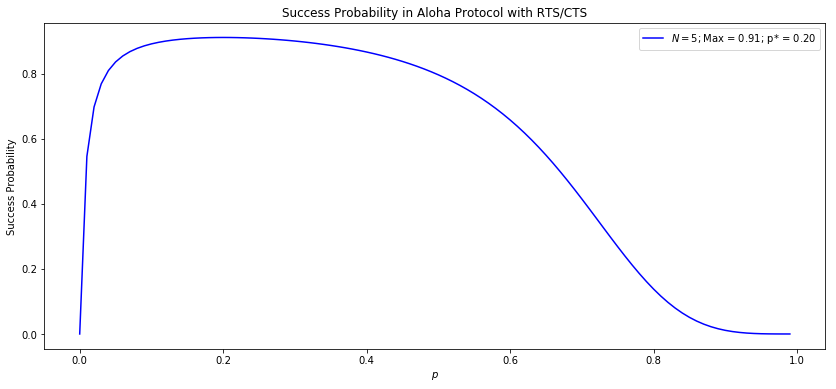

In [9]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure, show
figsize(14, 6)

import scipy.stats as stats

from ipywidgets import *
from IPython.display import display

w3 = widgets.IntSlider(description='N', min = 1, max = 20, step = 1, value = 5)
w5 = widgets.IntSlider(description='M', min = 10, max = 100, step = 10, value = 50)

def CSMA2_demo(N,M):
    S = 100
    a = np.arange(0.0,S)
    b = np.arange(0.0,S)
    for i in range(1,S):
        p = i/S
        alpha = N*p*(1 - p)**(N-1)
        b[i] = M/(M + 2/alpha) 
        a[i] = p
    maxb = max(b)
    pb = np.argmax(b)/S
    plt.plot(a, b, color='b', label = "$N = 5; $" + "Max = " + "%.2f"%maxb + "; p* = " + "%0.2f"%pb)
    plt.legend()
    plt.ylabel("Success Probability")
    plt.xlabel("$p$")
    plt.title("Success Probability in Aloha Protocol with RTS/CTS")
    
z = widgets.interactive(CSMA2_demo, N = w3, M = w5) 
display(z)  
        

This example shows that the RTS/CTS mechanism improves the efficiency of Aloha. Moreover, it shows that choosing $p = 0.1$ is reasonable as long as the number $N$ of active radios is not larger than $20$.  The efficiency of this scheme is similar to that of the contention slots mechanism.  However, the RTS/CTS has another benefit: by listening to the CTS message, the radios close to the intended destination know they should not transmit until the destination acknowledges the reception of the packet. This is useful, because some of those radios may hear the destination but not the source of the packet. 